# Chapter 8. Automating the Featurizer: Image Feature Extraction and Deep Learning

Windows / Anaconda 사용시 skimage 패키지가 import 안되는 경우 조치 방법

1. anaconda에서 pillow가 설치되어 있는 경우 제거
```
conda uninstall pillow
```

2. pip로 pillow 설치
```
pip install pillow
```

3. anaconda에서 scikit-image 설치. 기본 옵션인 경우 pillow가 같이 설치되므로 no dependency 옵션 지정.
```
conda install -c conda-forge --no-deps scikit-image
```

In [1]:
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure

import matplotlib.pyplot as plt
%matplotlib notebook

## HOG (Histogram of Oriented Gradients) 예제

In [2]:
# 예제 이미지를 로드하여 그레이 스케일로 변환
image = color.rgb2gray(data.chelsea())

<IPython.core.display.Javascript object>


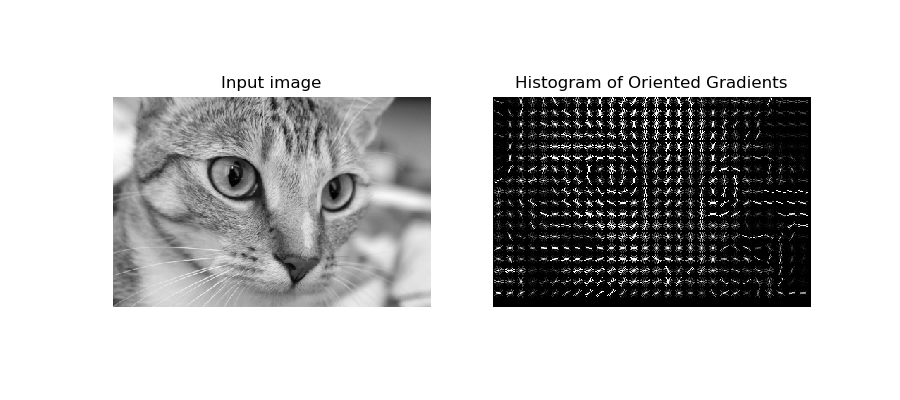

Text(0.5,1,'Histogram of Oriented Gradients')

In [3]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), block_norm='L2-Hys', visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

## Example 8-1. Calculating simple image gradients using Python

In [4]:
# 1D 필터를 사용해 수평 그래디언트를 계산.
# 이미지 경계에 있지 않은 픽셀의 그래디언트는 그 오른쪽 및 왼쪽 이웃과의 차이.
# 가장 왼쪽과 가장 오른쪽 경계에 있는 픽셀의 그래디언트는 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

# 수직 그래디언트도 동일하게 처리
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

<IPython.core.display.Javascript object>


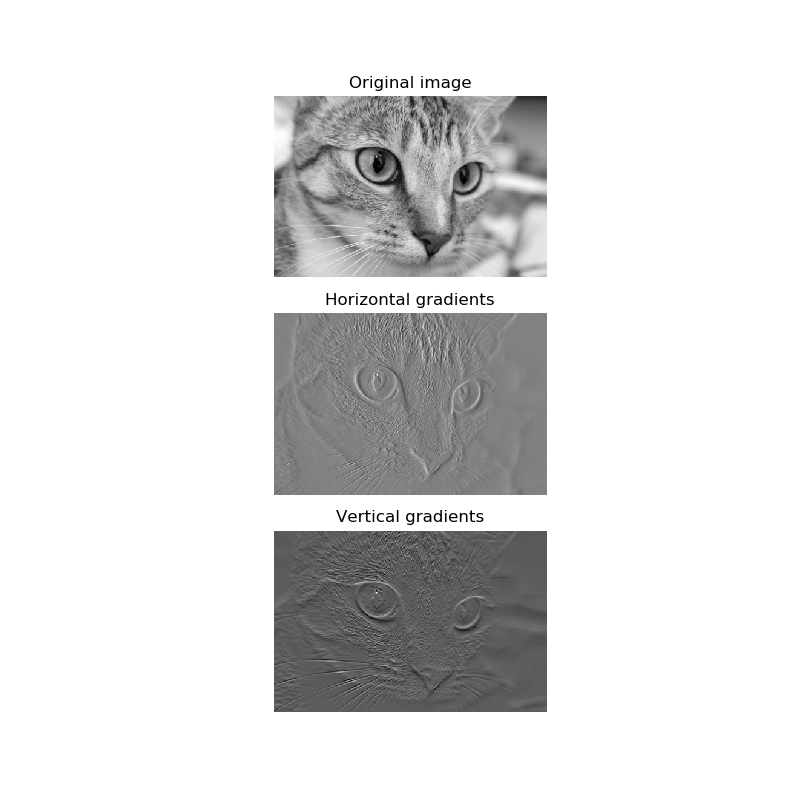

Text(0.5,1,'Vertical gradients')

In [5]:
# 그림 8-4
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')

## Example 8-2. Applying a simple Gaussian filter on an image

In [6]:
# 먼저 가우시안을 계산하기 위해 5x5 크기의 X, Y 그리드 생성
ind = [-1., -0.5, 0., 0.5, 1.]
X,Y = np.meshgrid(ind, ind)
X

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [7]:
# G는 (0,0)의 값이 1.0인 단순하고 비정규화된 가우시안 커널이다.
G = np.exp(-(np.multiply(X,X) + np.multiply(Y,Y))/2)
G

array([[0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944]])

In [8]:
# 이미지 로드하고 그레이 스케일로 변환
cat = color.rgb2gray(data.chelsea())

In [9]:
from scipy import signal
blurred_cat = signal.convolve2d(cat, G, mode='valid')

<IPython.core.display.Javascript object>


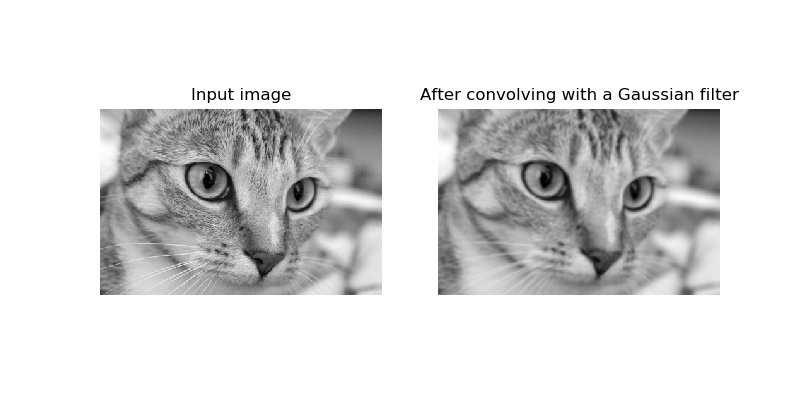

Text(0.5,1,'After convolving with a Gaussian filter')

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cat, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(blurred_cat, cmap=plt.cm.gray)
ax2.set_title('After convolving with a Gaussian filter')

## Extra Example - Convolution Blur

In [11]:
from scipy.signal import convolve2d

In [12]:
# 2차원 가우시안 필터 생성.
def make_filter(fsize=10):
    N1 = N2 = fsize
    center = N1/2

    W = np.zeros((N1, N2))
    for i in range(N1):
        for j in range(N2):
            dist = (i - center)**2 + (j - center)**2  # square distance from the center
            W[i, j] = np.exp(-dist / 50.)

    W /= W.sum() # normalize the kernel
    return W

<IPython.core.display.Javascript object>


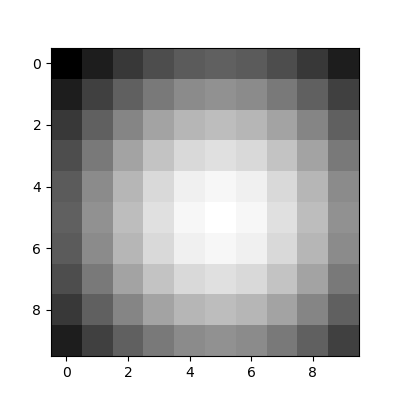

<IPython.core.display.Javascript object>


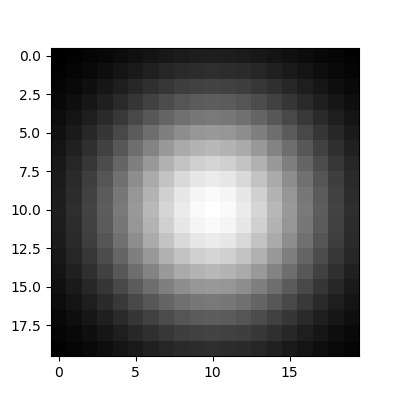

In [13]:
g_filter10 = make_filter()
g_filter20 = make_filter(20)

# 생성한 가우시안 필터 확인
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(g_filter10, cmap=plt.cm.gray)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(g_filter20, cmap=plt.cm.gray)

<IPython.core.display.Javascript object>


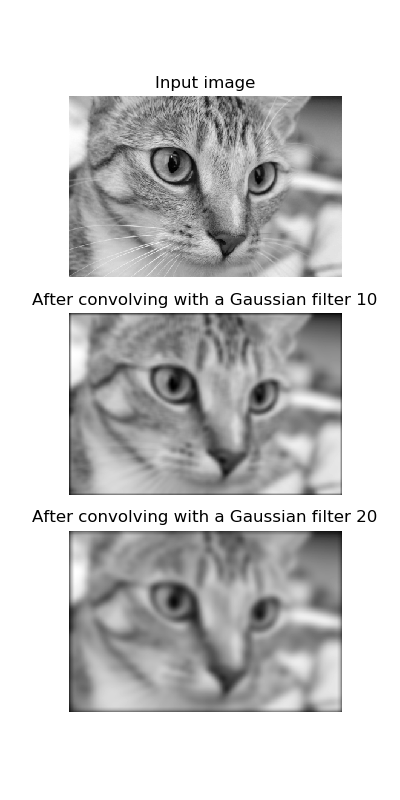

Text(0.5,1,'After convolving with a Gaussian filter 20')

In [14]:
blurred_cat10 = convolve2d(cat, g_filter10, mode='same')
blurred_cat20 = convolve2d(cat, g_filter20, mode='same')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4,8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cat, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(blurred_cat10, cmap=plt.cm.gray)
ax2.set_title('After convolving with a Gaussian filter 10')

ax3.axis('off')
ax3.imshow(blurred_cat20, cmap=plt.cm.gray)
ax3.set_title('After convolving with a Gaussian filter 20')